
# Проект


В этом проекте мы работаем с данными некоммерческого проекта, посвящённого проблеме дорожно-транспортных происшествий в России.

Необходимо провести исследование данных и изучить взаимосвязи в них. Особенно важно узнать, с чем связана аварийность на дорогах.

## Задачи:
Предобработка данных: изменить названия столбцов и типы данных и ответить на вопросы заказчика.

### Вопросы заказчика

1. Как распределено количество участников ДТП и почему? Встречаются ли аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Для числа участников нужно найти типичное значение.

2. Между какими столбцами в датасете высокая корреляция?

3. Как связаны категории аварий и погодные условия?

4. Какова процентная разбивка аварий по видам освещённости с учетом пола участника?

5. Чем отличаются аварии без пострадавших от тех, в которых был один пострадавший или более?

6. Какие рекомендации вы можете дать заказчику относительно корреляций различных факторов с аварийностью?

In [15]:
# Загрузим данные и выполните небольшую предобработку
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_info = pd.read_csv('sample_1.csv')
df_part = pd.read_csv('sample_2.csv')
df_info.columns = [c.replace('properties.', '') for c in df_info.columns]

In [16]:
# Объединим датафреймы
df=pd.merge(df_info, df_part, how='left', on='id')

In [17]:
# Напишем функцию для обзора данных:
def review(df, df_name):
    print(f'{"-"*50}')
    print(f'ОБЗОР ДАННЫХ: {df_name}')
    print(f'{"-"*50}')

    print('\nПЕРВЫЕ 5 СТРОК:')
    display(df.head())

    print('\nИНФОРМАЦИЯ О ДАННЫХ:')
    df.info()

    print('\nКОЛИЧЕСТВО ПРОПУСКОВ:')
    missing_count = df.isna().sum()
    display(missing_count[missing_count>0] if missing_count.sum() != 0 else 'Пропусков нет')

    print('\nПРОЦЕНТ ПРОПУСКОВ:')
    missing_percent = round((df.isna().mean() * 100),2)
    display(missing_percent[missing_percent > 0] if missing_percent.sum() !=0 else '0%')

    print('\nРАСПРЕДЕЛЕНИЕ ДАННЫХ:')
    display(df.describe())

    print('\nУНИКАЛЬНЫЕ ЗНАЧЕНИЯ КАТЕГОРИАЛЬНЫХ СТОЛБЦОВ:')
    for column in list(df.columns):
        if (df[column].dtypes == 'object' or df[column].dtypes == 'category') and df[column].nunique() <= 15:
            print(column+':')
            display(df[column].unique())

    print('\nКОЛИЧЕСТВО ЯВНЫХ ДУБЛИКАТОВ:')
    duplicates = df.duplicated().sum()
    display(duplicates if duplicates != 0 else 0)


In [18]:
# Вызовем функцию
dataframes = [df]
names = ["df"]

for i, df in enumerate(dataframes):
    review(df, names[i])

--------------------------------------------------
ОБЗОР ДАННЫХ: df
--------------------------------------------------

ПЕРВЫЕ 5 СТРОК:


,geometry.coordinates,id,tags,light,point.lat,point.long,nearby,region,scheme,address,...,injured_count,parent_region,road_conditions,participants_count,participant_categories,role,gender,violations,health_status,years_of_driving_experience
0,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,...,1,Кировская область,['Мокрое'],3,['Все участники'],Водитель,Мужской,['Несоответствие скорости конкретным условиям ...,"Раненый, находящийся (находившийся) на амбулат...",26.0
1,"[47.875603, 57.24379]",1983180,Дорожно-транспортные происшествия,Светлое время суток,57.243790,47.875603,[],Яранский район,600.0,Р-176 Вятка Чебоксары - Йошкар-Ола - Киров - С...,...,1,Кировская область,['Мокрое'],3,['Все участники'],Пешеход,Женский,[],Получил телесные повреждения с показанием к ле...,NaN
2,"[47.87903, 57.304807]",2889433,Дорожно-транспортные происшествия,Светлое время суток,57.304807,47.879030,"['Административные здания', 'Нерегулируемый пе...",Яранский район,710.0,"г Яранск, ул Кирова, 10",...,1,Кировская область,"['Сухое', 'Отсутствие, плохая различимость гор...",2,"['Все участники', 'Пешеходы']",Водитель,Мужской,[],Не пострадал,34.0
3,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",...,1,Кировская область,['Мокрое'],1,['Все участники'],Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN
4,"[47.840781, 57.297156]",2591208,Дорожно-транспортные происшествия,Сумерки,57.297156,47.840781,"['Жилые дома индивидуальной застройки', 'Нерег...",Яранский район,NaN,"г Яранск, ул Чапаева, 80",...,1,Кировская область,['Мокрое'],1,['Все участники'],Пассажир,Мужской,[],"Раненый, находящийся (находившийся) на амбула...",NaN



ИНФОРМАЦИЯ О ДАННЫХ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   geometry.coordinates         32412 non-null  object 
 1   id                           32412 non-null  int64  
 2   tags                         32412 non-null  object 
 3   light                        32412 non-null  object 
 4   point.lat                    32362 non-null  float64
 5   point.long                   32362 non-null  float64
 6   nearby                       32412 non-null  object 
 7   region                       32412 non-null  object 
 8   scheme                       29821 non-null  float64
 9   address                      30931 non-null  object 
 10  weather                      32412 non-null  object 
 11  category                     32412 non-null  object 
 12  datetime                     32412 non-null  object 

point.lat                         50
point.long                        50
scheme                          2591
address                         1481
role                            1177
gender                          2025
violations                      1177
health_status                   1277
years_of_driving_experience    15503
dtype: int64


ПРОЦЕНТ ПРОПУСКОВ:


point.lat                       0.15
point.long                      0.15
scheme                          7.99
address                         4.57
role                            3.63
gender                          6.25
violations                      3.63
health_status                   3.94
years_of_driving_experience    47.83
dtype: float64


РАСПРЕДЕЛЕНИЕ ДАННЫХ:


,id,point.lat,point.long,scheme,injured_count,participants_count,years_of_driving_experience
count,3.241200e+04,32362.000000,32362.000000,29821.000000,32412.000000,32412.000000,16909.000000
mean,2.303524e+06,58.397378,49.654534,548.785420,1.311366,2.354714,16.108226
std,3.906577e+05,0.976691,1.151714,294.329018,0.786948,1.000460,11.907786
min,1.979481e+06,0.490633,0.592429,10.000000,1.000000,1.000000,1.000000
25%,1.983534e+06,58.466115,49.579046,300.000000,1.000000,2.000000,7.000000
50%,1.987545e+06,58.591729,49.650430,610.000000,1.000000,2.000000,14.000000
75%,2.693418e+06,58.617577,49.734850,820.000000,1.000000,3.000000,23.000000
max,3.011884e+06,68.395800,65.537500,980.000000,30.000000,30.000000,66.000000



УНИКАЛЬНЫЕ ЗНАЧЕНИЯ КАТЕГОРИАЛЬНЫХ СТОЛБЦОВ:
tags:


array(['Дорожно-транспортные происшествия'], dtype=object)

light:


array(['Светлое время суток', 'Сумерки',
       'В темное время суток, освещение отсутствует',
       'В темное время суток, освещение не включено',
       'В темное время суток, освещение включено'], dtype=object)

parent_region:


array(['Кировская область'], dtype=object)

role:


array(['Водитель', 'Пешеход', 'Пассажир', 'Велосипедист',
       'Пешеход, перед ДТП находившийся в (на) ТС в качестве водителя или пешеход, перед ДТП находившийся в (на) ТС в качестве пассажира',
       nan], dtype=object)

gender:


array(['Мужской', 'Женский', nan], dtype=object)

health_status:


array(['Раненый, находящийся (находившийся) на амбулаторном лечении, либо в условиях дневного стационара',
       'Получил телесные повреждения с показанием к лечению в медицинских организациях (кроме разовой медицинской помощи)',
       'Не пострадал',
       'Раненый, находящийся (находившийся)  на амбулаторном лечении, либо которому по характеру полученных травм обозначена необходимость амбулаторного лечения (вне зависимости от его фактического прохождения)',
       'Раненый, находящийся (находившийся) на стационарном лечении', nan,
       'Получил травмы с оказанием разовой медицинской помощи, к категории раненый не относится',
       'Получил телесные повреждения с показанием к лечению в медицинских организациях, фактически лечение не проходил, к категории раненый не относится'],
      dtype=object)


КОЛИЧЕСТВО ЯВНЫХ ДУБЛИКАТОВ:


9727

In [19]:
# удалим дубликаты
df.drop_duplicates(inplace=True)
df[df.duplicated()]

,geometry.coordinates,id,tags,light,point.lat,point.long,nearby,region,scheme,address,...,injured_count,parent_region,road_conditions,participants_count,participant_categories,role,gender,violations,health_status,years_of_driving_experience


In [20]:
# Переведем столбец `datetime` в тип данных 'datetime'
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce').dt.date
df['datetime'] = pd.to_datetime(df['datetime'])


## Исследование данных

### 1. Исследования данных участников ДТП

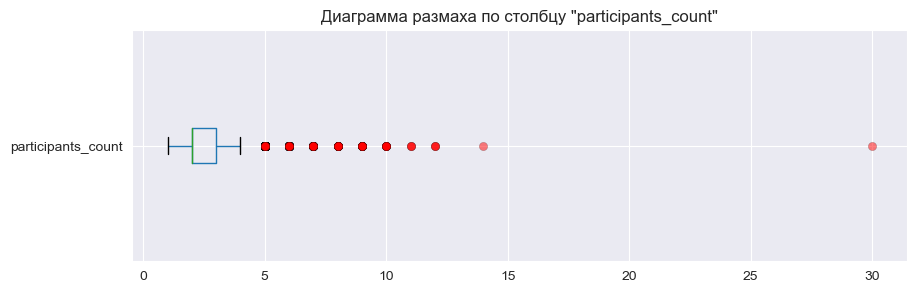

In [21]:
# Построим диаграмму размаха по столбцу 'seats'
df.boxplot(column='participants_count', figsize=(10,3), vert=False, flierprops=dict(markerfacecolor='red', markersize=6, marker='o', alpha=0.5, markeredgewidth=0.2))
plt.title('Диаграмма размаха по столбцу "participants_count"')
plt.show()

В столбце присутствуют выбросы, которые действительно могут встречаться в **редких более масштабных** авариях.

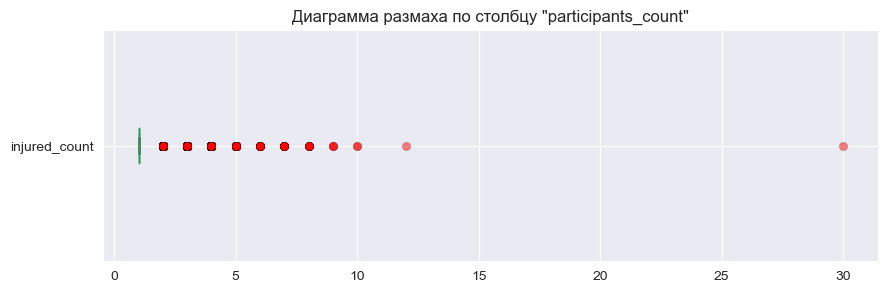

In [22]:
# Построим диаграмму размаха по столбцу 'seats'
df.boxplot(column='injured_count', figsize=(10,3), vert=False, flierprops=dict(markerfacecolor='red', markersize=6, marker='o', alpha=0.5, markeredgewidth=0.2))
plt.title('Диаграмма размаха по столбцу "participants_count"')
plt.show()

**Аналогичная** ситуация и со столбцом с числом пострадавших.

### 2. Расчет корреляции между столбцами

interval columns not set, guessing: ['injured_count', 'participants_count', 'years_of_driving_experience']


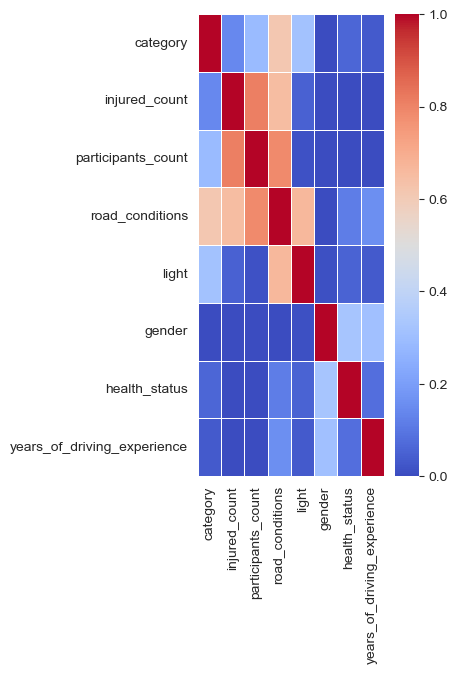

In [23]:
# Построим матрицу корреляции при помощи '.phik.matrix()' и визуализируем ее при помощи 'sns.heatmap'
corr_matrix = df[['category', 'injured_count','participants_count','road_conditions','light','gender','health_status', 'years_of_driving_experience']].phik_matrix()
data_heatmap = corr_matrix
plt.figure(figsize=(3, 6))
sns.heatmap(
    data_heatmap,
    annot=False,
    fmt='.2f',
    cmap='coolwarm',
    linewidths=0.5
)
plt.show()

Обозначились некоторые корреляции:
1. Категория ДТП по какой-то причине связана с освещенностью;
2. Кол-во пострадавших связано с кол-вом участников и состоянием покрытия;
3. Состояние дорожного покрытия также связано с категорией и освещенностью.


### 3. Связь категорий аварий и погодных условий

In [24]:
# группируем данные
grouped = df.groupby(['category', 'weather'], as_index=False)['id'].nunique()
# диаграмма рассеяния
grouped.plot.scatter(x='category', y='weather', rot=90, s='id', alpha=0.5)

<Axes: xlabel='category', ylabel='weather'>

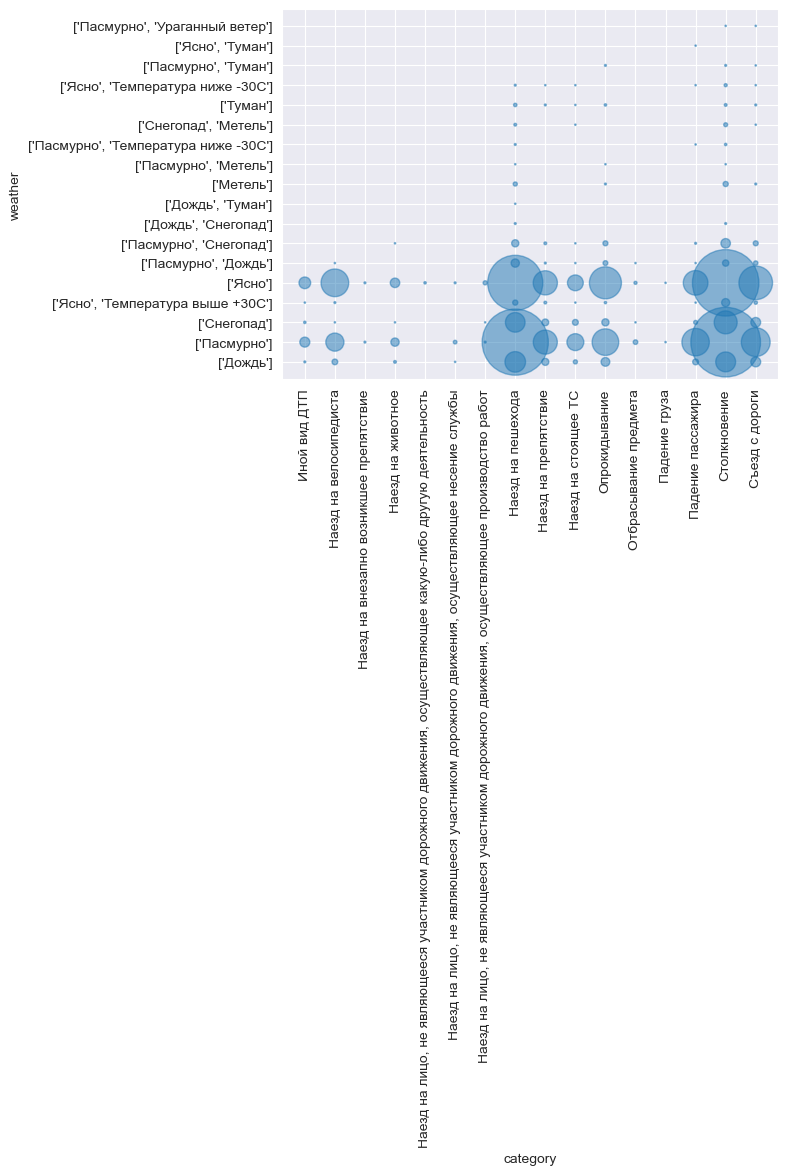

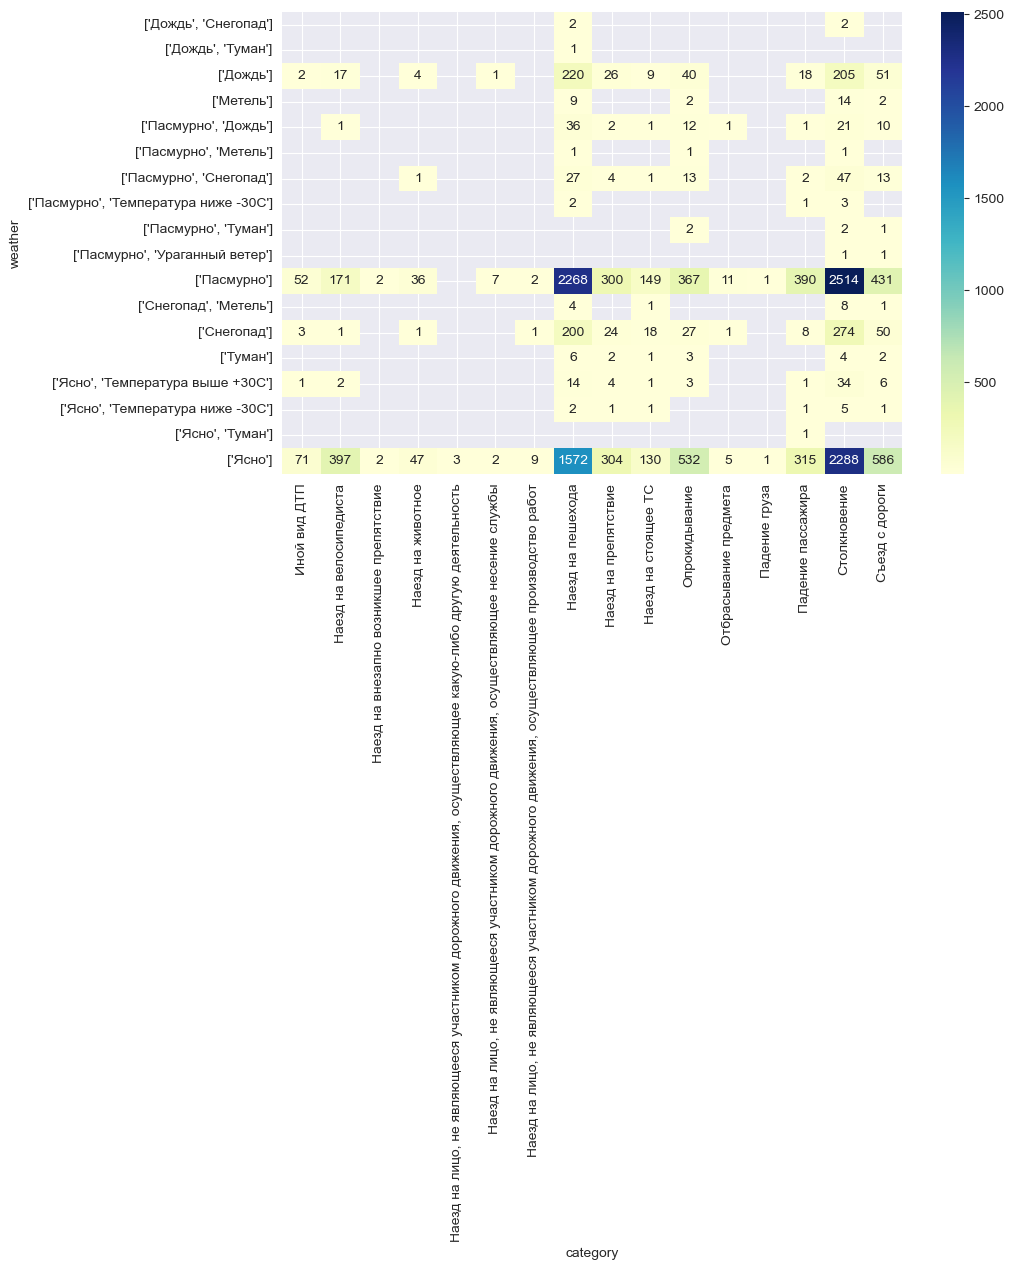

In [25]:
# Сводная таблица и тепловая карта
pivot = grouped.pivot(index='weather', columns='category', values='id')


plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt='.0f',
    cmap='YlGnBu'
)
plt.show()

Наезд на пешехода и столкновения значительно чаще во время **снегопада**, **пасмурной погоды** или **дождя**. Хотя это происходит также часто и в **ясный** день.

### 4. Процентная разбивка аварий по видам освещённости

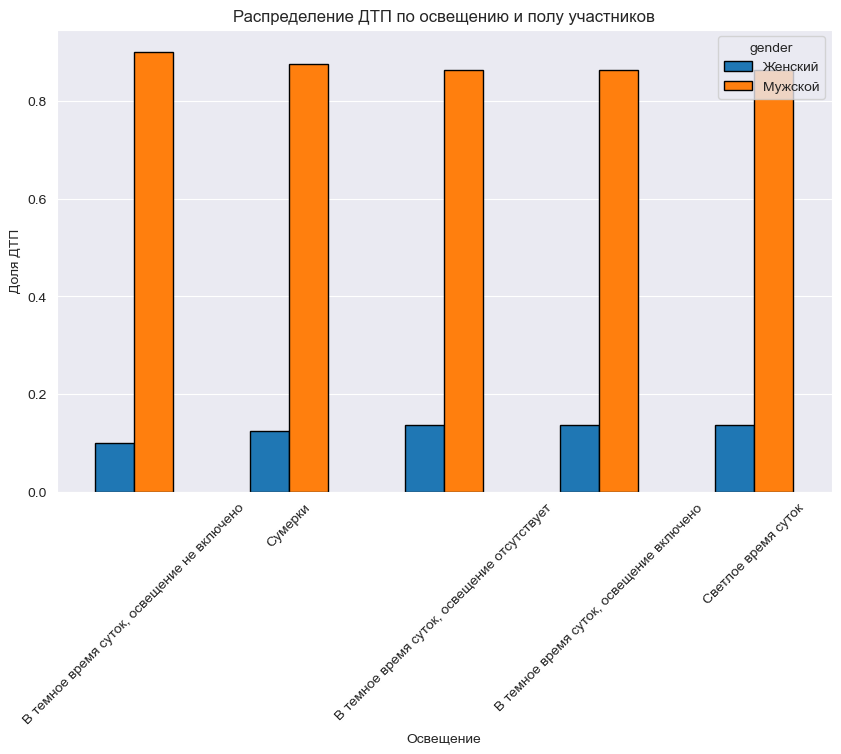

In [26]:

# Сгруппируем данные и сделаем столбчатую диаграмму
temp_df=df[df['role']=='Водитель']
grouped = temp_df.groupby(['light', 'gender'])['id'].nunique().unstack()
grouped = grouped.div(grouped.sum(axis=1), axis=0)

grouped.sort_values(by='Мужской', ascending=False).plot.bar(
    figsize=(10,6),
    title='Распределение ДТП по освещению и полу участников',
    xlabel='Освещение',
    ylabel='Доля ДТП',
    edgecolor='black',
    rot=45,
    legend=True)

plt.grid(axis='x')
plt.show()

ДТП с **мужчинами** случаются чаще при **плохой освещенности**. У **женщин наоборот**.

### 5. Отличия аварий без пострадавших от тех, в которых был один пострадавший или более

In [27]:
# Создадим отфильтрованные датафреймы
df_no_inj=df[df['health_status'] == 'Не пострадал']
df_is_inj=df[df['health_status'] != 'Не пострадал']

# Создадим функцию для построения визуализаций:
def plot(df1, df2, group_col, counter, axes):
    # Группировка и нормализация
    grouped_1 = df1.groupby(group_col)['id'].nunique()
    grouped_norm_1 = grouped_1 / grouped_1.sum() * 100
    # Фильтрация
    new_index_1 = grouped_norm_1.index.where(grouped_norm_1 >= 5, 'Другие')
    grouped_norm_1.index = new_index_1
    # Перегруппировка
    grouped_norm_1 = grouped_norm_1.groupby(level=0).sum()

    grouped_2 = df2.groupby(group_col)['id'].nunique()
    grouped_norm_2 = grouped_2 / grouped_2.sum() * 100
    # Фильтрация
    new_index_2 = grouped_norm_2.index.where(grouped_norm_2 >= 5, 'Другие')
    grouped_norm_2.index = new_index_2
    # Перегруппировка
    grouped_norm_2 = grouped_norm_2.groupby(level=0).sum()

    # Первый график (без пострадавших)
    grouped_norm_1.sort_values(ascending=False).plot.pie(
        ax=axes[counter, 0],
        title=f'Распределение доли аварий без пострадавших по {group_col}',
        ylabel='Доля',
        labels=grouped_norm_1.sort_values(ascending=False).index,
        labeldistance=1.2,  # смещение подписей от центра
        textprops={'fontsize': 8},  # размер шрифта
        rot=90,
        autopct='%1.1f%%'
    )
    axes[counter, 0].grid(axis='x')

    # Второй график (с пострадавшими)
    grouped_norm_2.sort_values(ascending=False).plot.pie(
        ax=axes[counter, 1],
        title=f'Распределение доли аварий с пострадавшими по {group_col}',
        ylabel='Доля',
        labels=grouped_norm_2.sort_values(ascending=False).index,
        labeldistance=1.2,  # смещение подписей от центра
        textprops={'fontsize': 8},  # размер шрифта
        rot=90,
        autopct='%1.1f%%'
    )
    axes[counter, 1].grid(axis='x')


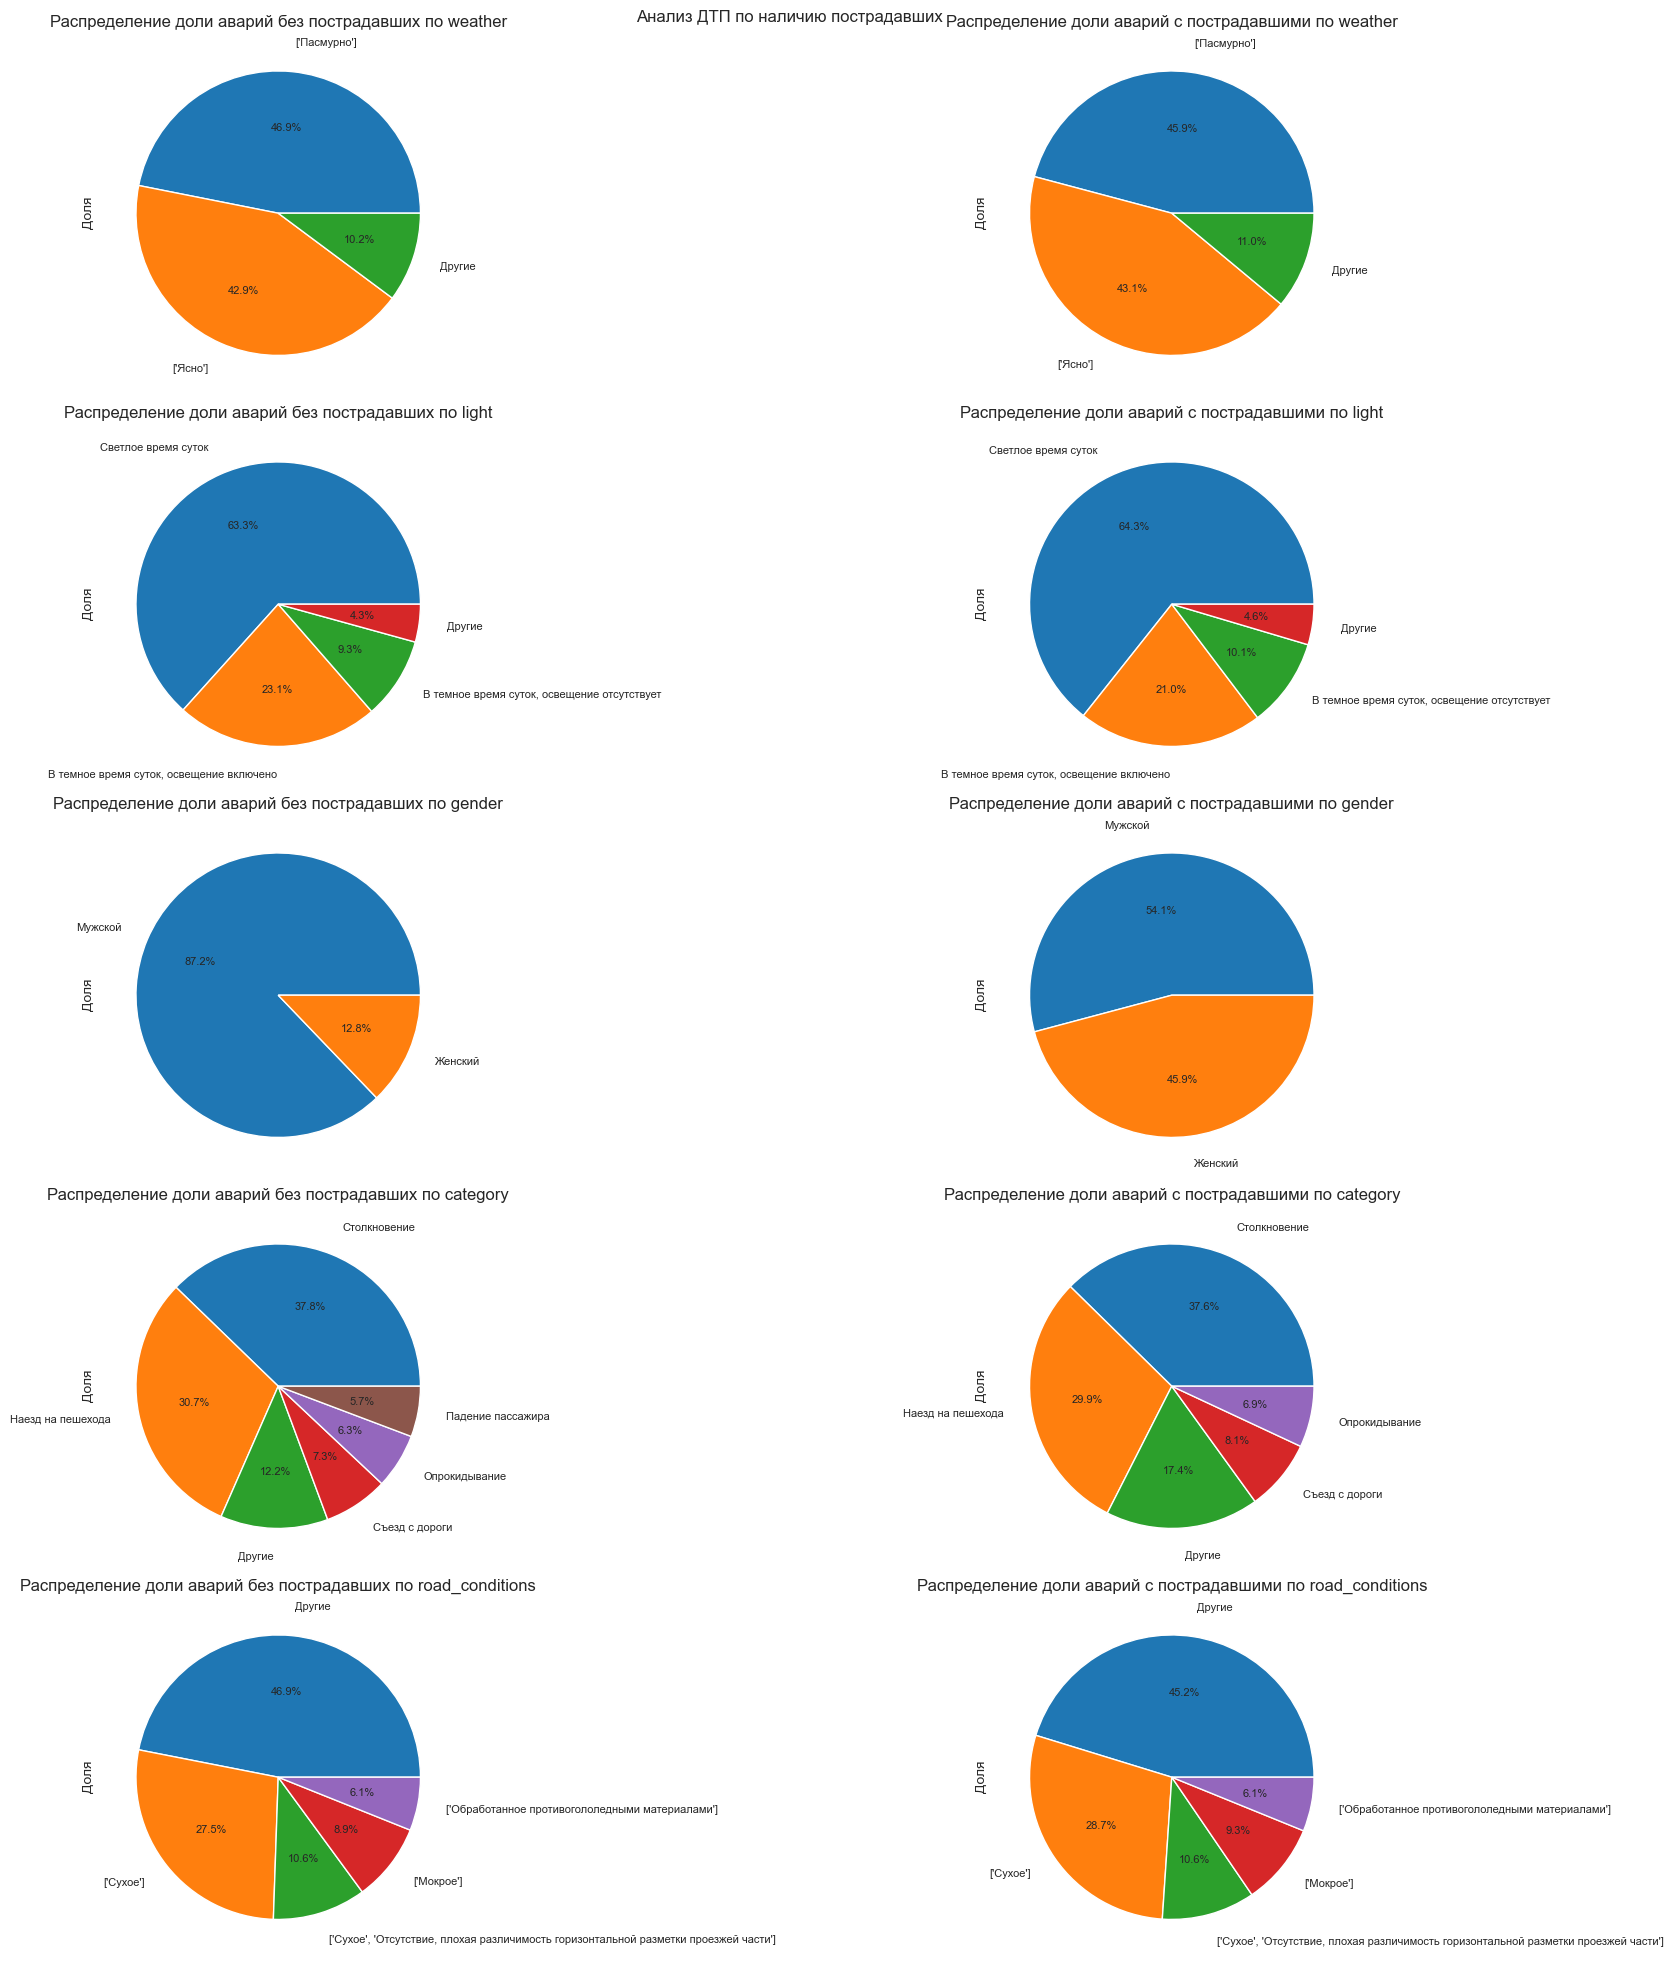

In [28]:
# Создание subplots
# road_conditions
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 20))
# Вызовем функцию в цикле
for counter, column in enumerate(['weather', 'light', 'gender', 'category', 'road_conditions']):
    plot(df_no_inj, df_is_inj, column, counter, axes)

# Настройки холста
fig.suptitle('Анализ ДТП по наличию пострадавших')
plt.tight_layout()
plt.show()

Разница между ДТП с пострадавшими и без присутствует только в **гендерном** распределении. В ДТП с пострадавшими сильно **больше женщин**.

### 6. Общий вывод о связи аварийности с другими факторами. Рекомендации заказчику

1. В целом в данных не найдено необъяснимых **аномалий**.
2. Для уменьшения аварийности важно обратить внимание на **освещенность** и состояние дорожного **покрытия**.
3. Наезд на пешехода и столкновения значительно чаще происходят во время **снегопада**, **пасмурной** погоды или **дождя**.
4. ДТП с **мужчинами** случаются чаще при **плохой освещенности**. У **женщин** по какой-то причине наблюдается обратная тенденция. Возможно нужны дополнительные исследования.
5. Разница между ДТП с пострадавшими и без присутствует только в **гендерном** распределении. В ДТП с пострадавшими сильно **больше женщин**. Возможно нужны дополнительные исследования.